In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
rand_state = 1000

In [105]:
df = pd.read_csv('wage_regularization.csv')
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [108]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


In [109]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # be careful, inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


In [110]:
import statsmodels.api as sm

In [111]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [112]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.83e-17
Time:                        16:26:22   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.160
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0610   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fitting Model for Initial Performance

In [113]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [114]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [115]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [116]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.202696,-0.012852,-0.012852
238,1.910343,0.699718,0.704007,-0.012852,-0.012852
531,-0.700110,-0.065042,0.045579,-0.012852,-0.012852
157,2.328510,0.689508,0.653410,-0.012852,-0.012852
601,1.341239,0.208652,0.171149,-0.012852,-0.012852


In [117]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,0.169172,0.0,0.0
1,educ2,462.562174,0.309854,0.0,0.0
2,educ3,-736.380870,0.232209,0.0,0.0
3,educ4,527.476085,-0.016857,0.0,0.0
4,educ5,-143.414487,-0.393124,0.0,0.0
5,age,-1295.337041,0.005242,0.0,0.0
6,age2,5164.462000,0.136966,0.0,0.0
7,age3,-7783.011676,0.147814,0.0,0.0
8,age4,5255.053787,0.043936,0.0,0.0
9,age5,-1341.061046,-0.166490,0.0,0.0


In [118]:
model_linear.score(X_test, y_test)

0.19834855576222632

In [119]:
MSE_test_lin = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test_lin = np.sqrt(MSE_test_lin)
np.round(RMSE_test_lin,3)

0.865

In [120]:
model_ridge.score(X_test, y_test)

0.19526327537198962

In [121]:
MSE_test_ridge = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test_ridge = np.sqrt(MSE_test_ridge)
np.round(RMSE_test_ridge,3)

0.867

In [122]:
model_lasso.score(X_test, y_test)

-0.004424039833469173

In [123]:
MSE_test_lasso = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test_lasso = np.sqrt(MSE_test_lasso)
np.round(RMSE_test_lasso,3)

0.968

In [124]:
model_net.score(X_test, y_test)

-0.004424039833469173

In [125]:
MSE_test_net = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test_net = np.sqrt(MSE_test_net)
np.round(RMSE_test_net,3)

0.968

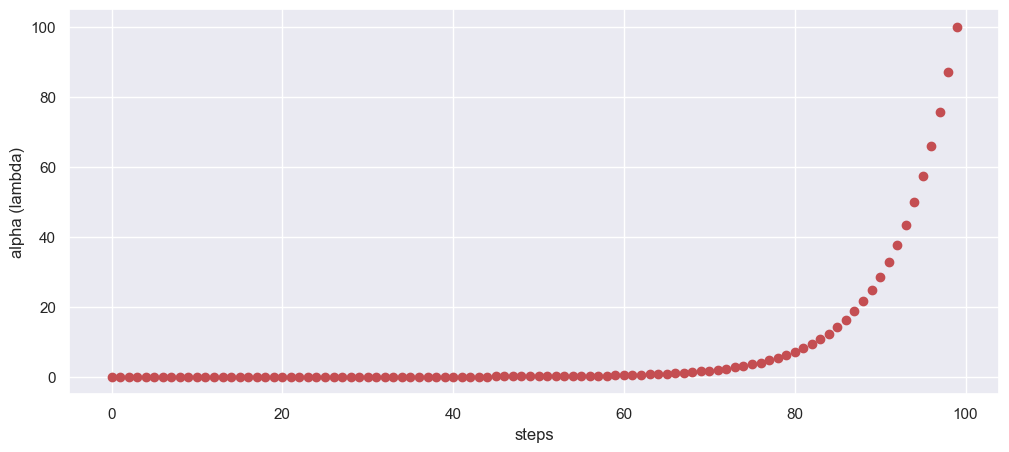

In [126]:
alphas = 10**np.linspace(-4,2,100)
plt.figure(figsize=(12,5))
plt.plot(alphas,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [129]:
ridge = Ridge()
coefs_ridge = []

for i in alphas:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

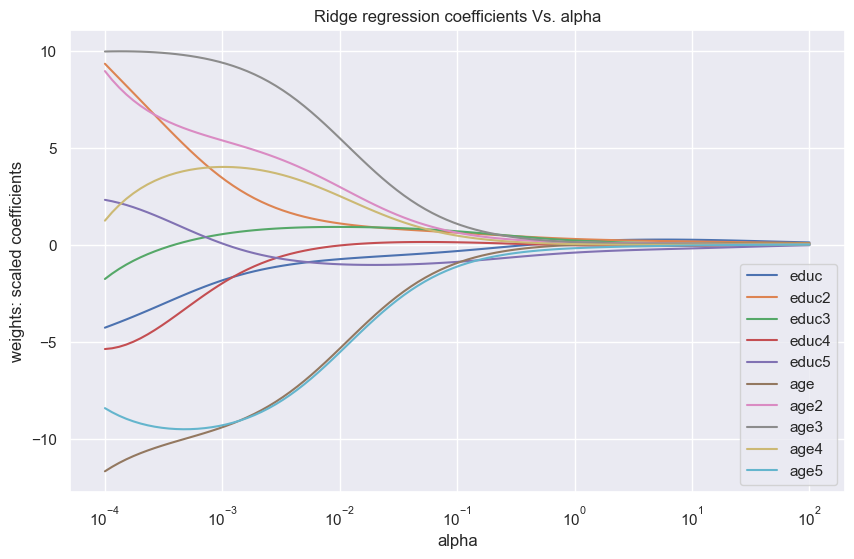

In [130]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

In [131]:
lasso = Lasso()
coefs_lasso = []

for i in alphas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

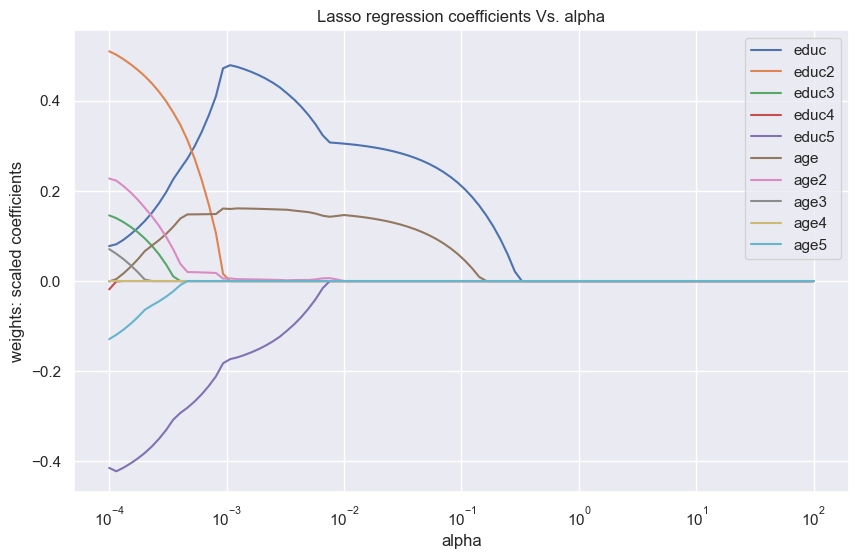

In [132]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

In [133]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alphas:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

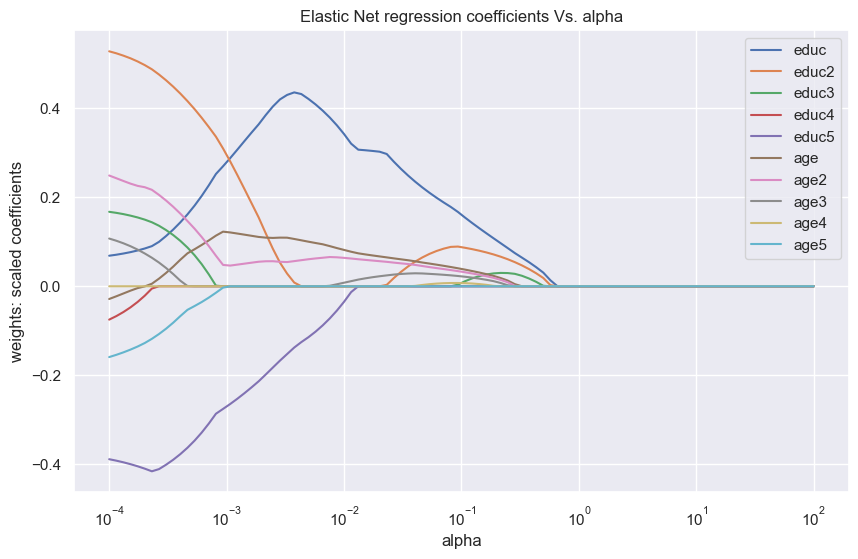

In [135]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

### Cross Validation for the Optimal Alpha

#### Ridge Regression

In [136]:
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.004977023564332114

In [137]:
alpha_ridge_opt = ridgecv.alpha_

In [138]:
ridgecv.coef_

array([-0.91098705,  1.45592853,  0.90869226, -0.29686326, -0.86650638,
       -7.01043122,  3.90366929,  7.16103252,  3.26168886, -7.18500268])

#### Lasso Regression

In [139]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.01

In [140]:
alpha_lasso_opt = lassocv.alpha_

In [141]:
lassocv.coef_

array([ 3.05014980e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.46529614e-01,  1.10315220e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

#### Elastic Net Regression

In [142]:
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=np.linspace(0.0, 1, 11))
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.01519911082952933

In [143]:
elasticnetcv.l1_ratio_

0.7000000000000001

In [144]:
alpha_elasticnet_opt = elasticnetcv.alpha_

In [145]:
elasticnetcv.coef_

array([ 0.30315252,  0.        ,  0.        ,  0.        , -0.        ,
        0.08183184,  0.06151766,  0.00225436,  0.        ,  0.        ])

### Refit the Model

In [157]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha= alpha_ridge_opt)
model_lasso = Lasso(alpha= alpha_lasso_opt)
model_net = ElasticNet(alpha= alpha_elasticnet_opt)

In [158]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [159]:
df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.252619,-0.214151,-0.215513
238,1.910343,0.699718,0.686303,0.810961,0.816272
531,-0.700110,-0.065042,-0.037980,0.024603,0.033229
157,2.328510,0.689508,0.671949,0.763748,0.765475
601,1.341239,0.208652,0.223092,0.155429,0.157474


#### Scores for the optimal alphas

In [160]:
model_linear.score(X_test, y_test)

0.19834855576222632

In [161]:
MSE_test_lin = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_linear']))
RMSE_test_lin = np.sqrt(MSE_test_lin)
np.round(RMSE_test_lin,3)

0.865

In [162]:
model_ridge.score(X_test, y_test)

0.19932369769733715

In [163]:
MSE_test_ridge = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test_ridge = np.sqrt(MSE_test_ridge)
np.round(RMSE_test_ridge,3)

0.864

In [164]:
model_lasso.score(X_test, y_test)

0.19270451107452424

In [165]:
MSE_test_lasso = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test_lasso = np.sqrt(MSE_test_lasso)
np.round(RMSE_test_lasso,3)

0.868

In [166]:
model_net.score(X_test, y_test)

0.1925741487633773

In [167]:
MSE_test_net = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test_net = np.sqrt(MSE_test_net)
np.round(RMSE_test_net,3)

0.868

Ranking the Models
1. Ridge
2. Default
3. Lasso
4. Elastic Net

We were able to slightly beat the default model with the Ridge Regression method.